#Autoencoders

1) implement stacked autoencoders

2) Denoising autoencoders (with dropout pixels and with gaussian noise)


#import libs and dataset

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import layers


#loading the dataset

In [4]:
df = pd.read_csv("/content/sample_data/mnist_train_small.csv")

In [5]:
X = df.iloc[:,1:].values

In [6]:
X.shape

(19999, 784)

#loading the saved trained model

In [16]:
save_path='/content/drive/MyDrive/dataset/saved_model/model_model'
model=keras.models.load_model(save_path)

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Building a proper NN having : Stacked autoencoder
input_shape,
300,
200,
100,
200,
300,
output_shape=input_shape

In [11]:
input = tf.keras.Input(shape=(784))
hidden1 = layers.Dense(300, activation="relu")(input)
hidden2 = layers.Dense(200, activation="relu")(hidden1)
hidden3 = layers.Dense(100, activation="relu")(hidden2)
hidden4 = layers.Dense(200, activation="relu")(hidden3)
hidden5 = layers.Dense(300, activation="relu")(hidden4)
output = layers.Dense(784, activation="relu")(hidden5)

model = tf.keras.Model(inputs=input, outputs=output)


#training Simple autoencoder

In [ ]:
model.compile(optimizer="adam", loss='mse', metrics=['accuracy'])
history = model.fit(X, X, batch_size=128, epochs=90)

Epoch 1/90
157/157 [==============================] - 6s 26ms/step - loss: 2731.4792 - accuracy: 0.0101
Epoch 2/90
157/157 [==============================] - 3s 17ms/step - loss: 1558.9631 - accuracy: 0.0130
Epoch 3/90
157/157 [==============================] - 3s 16ms/step - loss: 1378.1309 - accuracy: 0.0117
Epoch 4/90
157/157 [==============================] - 3s 17ms/step - loss: 1287.5857 - accuracy: 0.0126
Epoch 5/90
157/157 [==============================] - 3s 17ms/step - loss: 1233.4778 - accuracy: 0.0132
Epoch 6/90
157/157 [==============================] - 3s 17ms/step - loss: 1194.0232 - accuracy: 0.0135
Epoch 7/90
157/157 [==============================] - 3s 16ms/step - loss: 1160.3135 - accuracy: 0.0141
Epoch 8/90
157/157 [==============================] - 3s 16ms/step - loss: 1138.8435 - accuracy: 0.0144
Epoch 9/90
157/157 [==============================] - 3s 16ms/step - loss: 1123.0443 - accuracy: 0.0149
Epoch 10/90
157/157 [==============================] - 3s 17ms/s

In [ ]:
#saving the trained model
save_path='/content/drive/MyDrive/dataset/saved_model/model_model'
model.save(save_path)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/dataset/saved_model/model_model/assets


#taking test data from sample datasets

In [12]:
#lets have a fresh data
df1 = pd.read_csv("/content/sample_data/mnist_test.csv")
X_test = df.iloc[:,1:].values

#visualizing results

#original data

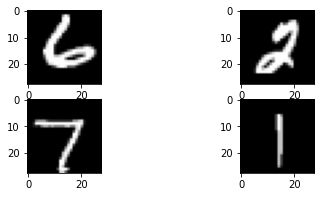

In [13]:
import matplotlib.pyplot as plt


def img(x):
  img = x
  img = img.reshape((28,28))
  return img

rows=2
columns=2
fig = plt.figure(figsize=(7, 3))

for i in range(100,104):
  fig.add_subplot(rows,columns,(5-(104-i)))
  plt.imshow(img(X_test[i]), cmap= plt.get_cmap("gray"))
plt.show()

#regenerated by the model

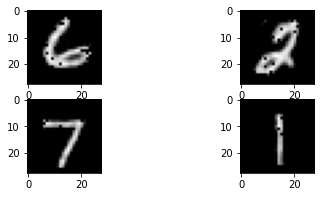

In [17]:
fig = plt.figure(figsize=(7, 3))
res=model.predict(X_test[100:104])
for i in range(4):
  fig.add_subplot(rows,columns,i+1)
  plt.imshow(img(res[i]),cmap=plt.get_cmap("gray"))
plt.show()

#visualizing single image

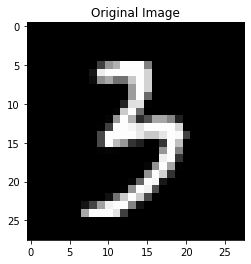

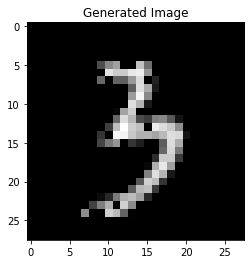

In [18]:
res1 = model.predict(X_test[401].reshape((1,-1)))

plt.imshow(img(X_test[401]), cmap= plt.get_cmap("gray"))
plt.title("Original Image")
plt.show()
plt.imshow(img(res1), cmap= plt.get_cmap("gray"))
plt.title("Generated Image")
plt.show()

#Visualizing Coding layer output

In [19]:
op=X_test[401].reshape(1,-1)

for layer in model.layers[:4]:
  op= layer(op, training=False)


img = np.array(op)
img = img.reshape((10,10))

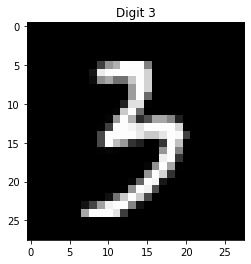

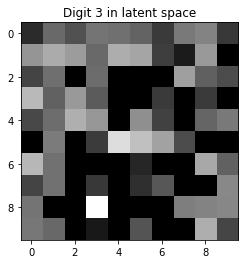

In [20]:
#how 3 number looks like in latent space
plt.imshow(X_test[401].reshape(28,28), cmap= plt.get_cmap("gray"))
plt.title("Digit 3")
plt.show()


plt.imshow(img, cmap= plt.get_cmap("gray"))
plt.title("Digit 3 in latent space")
plt.show()

# **DENOISING AUTOENCODER**

#model creation

In [23]:
#load the saved trained model
save_path='/content/drive/MyDrive/dataset/saved_model/denoising_model_corrected'
denoising_model=keras.models.load_model(save_path)

In [22]:
#As data is already loaded therefore we will build the model directly
#To create noise we add dropout layer with 80% dropping rate(i.e. 80% of the pixels in the image will not be visible)

input =  tf.keras.Input(shape=(784))
dropout_layer = layers.Dropout(.7)(input)
hidden1 = layers.Dense(300, activation="relu")(dropout_layer)
hidden2 = layers.Dense(200, activation="relu")(hidden1)
hidden3 = layers.Dense(100, activation="relu")(hidden2)
hidden4 = layers.Dense(200, activation="relu")(hidden3)
hidden5 = layers.Dense(300, activation="relu")(hidden4)
op = layers.Dense(784, activation=None)(hidden5)

denoising_model = tf.keras.Model(inputs=input, outputs=op)
#denoising_model = tf.keras.models.Sequential([input, dropout_layer, hidden1, hidden2, hidden3, hidden4, hidden5, op])

#training denoising autoencoder

In [ ]:
denoising_model.compile(optimizer="adam", loss='mse', metrics=['accuracy'])
history = denoising_model.fit(X, X, batch_size=128, epochs=50)

Epoch 1/50
157/157 [==============================] - 5s 20ms/step - loss: 3520.9836 - accuracy: 0.0090
Epoch 2/50
157/157 [==============================] - 3s 18ms/step - loss: 2390.4868 - accuracy: 0.0094
Epoch 3/50
157/157 [==============================] - 3s 18ms/step - loss: 2107.0645 - accuracy: 0.0102
Epoch 4/50
157/157 [==============================] - 3s 18ms/step - loss: 1956.4733 - accuracy: 0.0092
Epoch 5/50
157/157 [==============================] - 3s 18ms/step - loss: 1863.5859 - accuracy: 0.0093
Epoch 6/50
157/157 [==============================] - 3s 18ms/step - loss: 1790.8096 - accuracy: 0.0111
Epoch 7/50
157/157 [==============================] - 3s 17ms/step - loss: 1721.9843 - accuracy: 0.0106
Epoch 8/50
157/157 [==============================] - 3s 17ms/step - loss: 1676.6986 - accuracy: 0.0089
Epoch 9/50
157/157 [==============================] - 3s 18ms/step - loss: 1638.6628 - accuracy: 0.0102
Epoch 10/50
157/157 [==============================] - 3s 18ms/s

In [ ]:
#saving the model
save_path='/content/drive/MyDrive/dataset/saved_model/denoising_model_corrected'
denoising_model.save(save_path)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/dataset/saved_model/denoising_model_corrected/assets


#importing test data to visualize

In [24]:
#lets have a fresh data
df1 = pd.read_csv("/content/sample_data/mnist_test.csv")
X_test = df.iloc[:,1:].values

In [25]:
import matplotlib.pyplot as plt

def img(x):
  img = x
  img = img.reshape((28,28))
  return img


def image_l(x):
  img = np.array(x)
  img = img.reshape((28,28))
  return img  

#model summary

In [ ]:
denoising_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 200)               20200     
                                                                 
 dense_4 (Dense)             (None, 300)               60300 

#visualizing results of denoising autoencoder

In [26]:
org_img = X_test[104]


x = np.expand_dims(org_img.astype(np.float32),axis=0)

#getting the noisy image by passing the image through dropout layer
# dropout layer is only active during training and predicting time else inactive therefore using
# training=true
for layer in denoising_model.layers[0:2]:
  x=layer(x,training=True)

noisy_img = x[0,:]
noisy_img.shape

#image_l() function will reshape the flat image into 28x28 shape

TensorShape([784])

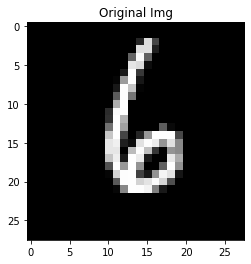

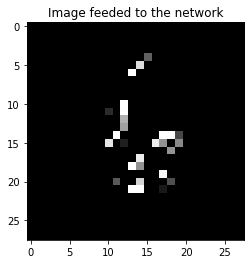

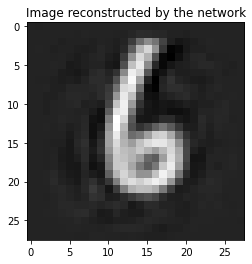

In [35]:

plt.imshow(img(X_test[104]),cmap= plt.get_cmap("gray"))
plt.title("Original Img")
plt.show()

noisy_img=image_l(x)
plt.imshow(noisy_img, cmap= plt.get_cmap("gray"))
plt.title("Image feeded to the network")
plt.show()


reconstructed_img = denoising_model.predict(org_img.reshape((1,-1)))

plt.imshow( image_l(reconstructed_img), cmap= plt.get_cmap("gray"))
plt.title("Image reconstructed by the network")
plt.show()



#visualizing results

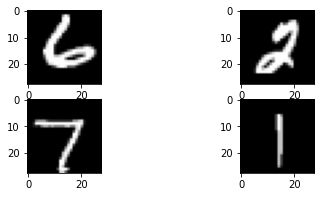

In [28]:
def img(x):
  img = x
  img = img.reshape((28,28))
  return img
rows=2
columns=2
fig = plt.figure(figsize=(7, 3))
for i in range(100,104):
  fig.add_subplot(rows,columns,(5-(104-i)))
  plt.imshow(img(X_test[i]), cmap= plt.get_cmap("gray"))
  #plt.axis('off')
plt.show()

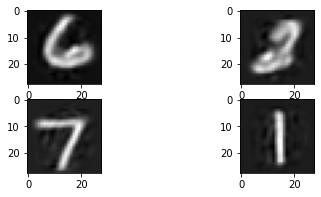

In [29]:
generated_imgs = denoising_model.predict(X_test[100:104])

fig = plt.figure(figsize=(7, 3))
res=denoising_model.predict(X_test[100:104])
for i in range(4):
  fig.add_subplot(rows,columns,i+1)
  plt.imshow(img(generated_imgs[i]),cmap=plt.get_cmap("gray"))
plt.show()

#Adding gausian noise to autoenoder
##**The procedure will remain same we just have to add noise to the inputs**

In [30]:

input =  tf.keras.layers.InputLayer(input_shape=(784,))
noise = layers.GaussianNoise(1)
hidden1 = layers.Dense(300, activation="relu")
hidden2 = layers.Dense(200, activation="relu")
hidden3 = layers.Dense(100, activation="relu")
hidden4 = layers.Dense(200, activation="relu")
hidden5 = layers.Dense(300, activation="relu")
op = layers.Dense(784, activation=None)

denoising_model_v1 = tf.keras.models.Sequential([input, noise, hidden1, hidden2, hidden3, hidden4, hidden5, op])
save_path='/content/drive/MyDrive/dataset/saved_model/denoising_model_v1_corrected'
denoising_model_v1=keras.models.load_model(save_path)

In [ ]:
denoising_model_v1.compile(optimizer="adam", loss='mse', metrics=['accuracy'])
history = denoising_model_v1.fit(X, X, batch_size=128, epochs=40, validation_split=.1)

In [ ]:
save_path='/content/drive/MyDrive/dataset/saved_model/denoising_model_v1_corrected'
denoising_model_v1.save(save_path)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/dataset/saved_model/denoising_model_v1_corrected/assets


In [31]:
#lets have a fresh data
df1 = pd.read_csv("/content/sample_data/mnist_test.csv")
X_test = df.iloc[:,1:].values

In [32]:
import matplotlib.pyplot as plt

def img(x):
  img = x
  img = img.reshape((28,28))
  return img


def image_l(x):
  img = np.array(x)
  img = img.reshape((28,28))
  return img  

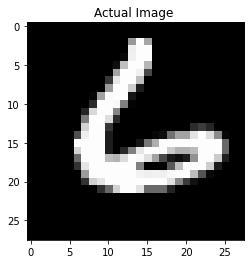

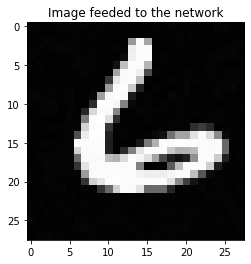

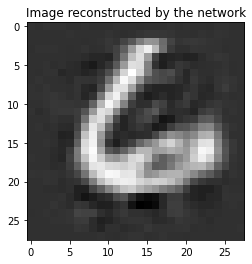

In [38]:
image_5 = X_test[100].astype(np.float32)
noisy_img  = noise(image_5, training=True)

input_img = input(X_test[100])

reconstructed_img = denoising_model_v1.predict(X_test[100].reshape((1,-1)))

plt.imshow(image_l(input_img).reshape((28,28)), cmap= plt.get_cmap("gray"))
plt.title("Actual Image ")
plt.show()


plt.imshow(image_l(noisy_img).reshape((28,28)), cmap= plt.get_cmap("gray"))
plt.title("Image feeded to the network")
plt.show()




plt.imshow(image_l(reconstructed_img).reshape((28,28)), cmap= plt.get_cmap("gray"))
plt.title("Image reconstructed by the network")
plt.show()
